### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [174]:
##For Google Colab only

#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [176]:
#data = pd.read_csv('/content/drive/My Drive/Berkeley/data/coupons.csv')
data = pd.read_csv('coupons.csv')

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [178]:
#Rename to fix the name of "passenger" column
data.rename(columns = {'passanger': 'passenger'}, inplace = True)

In [179]:
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [180]:
missingdata = data.isnull().sum()
missingdata

,0
destination,0
passenger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [181]:
# Missing Values Percentage per Column
print(missingdata*100/data.shape[0])

destination              0.000000
passenger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64


Clearly, the variable 'car' seems problematic as it has so many missing values.

In [182]:
#Explore the observations with 'car' information (12576 out of 12684 values are missing, so only 108 values!)
carsubset = data.dropna(subset = 'car')
#carsubset.info()
carsubset['Y'].value_counts(normalize = True).sort_index()

,proportion
Y,
0,0.425926
1,0.574074


In [183]:
explore = pd.crosstab(carsubset['car'],carsubset['Y'],
                      normalize = 'index')
print(explore)

Y                                                0         1
car                                                         
Car that is too old to install Onstar :D  0.190476  0.809524
Mazda5                                    0.272727  0.727273
Scooter and motorcycle                    0.500000  0.500000
crossover                                 0.619048  0.380952
do not drive                              0.545455  0.454545


3. Decide what to do about your missing data -- drop, replace, other...

Although there is a bit of interesting diversity in the coupon acceptance rate according to the values of this 'car' variable, less than 1\% of observations are available; hence, I am deciding to drop this variable for the rest of the analysis.

In [184]:
#Will drop the 'car' variable, as it has over 99% of values missing
data = data.drop('car', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [185]:
# Review remaining missing values
missingdata = data.isnull().sum()
missingdata

,0
destination,0
passenger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


#### What to do with the observations with missing values (in the remaining variables)?
Imputation could be done; a simplistic approach could assign a label of "never" to every missing value, but I feel a sophisticated analysis would be needed in order to do a better job assigning values (labels). All missing values are variables that reflect how often the user goes to the different categories of establishments offering the coupons -- possible values are labels such as "never", "1\~3", etc. An appropriate decision rule ought to take into account the information contained in the rest of the variables.

For this project, I am taking the simplest route and dropping all the rows with missing values (these represent less than 5\% of the total number of observations).

In [186]:
#Eliminate rows with missing values
cleandata = data.dropna()
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon?



In [201]:
couponsuccess = cleandata['Y'].value_counts().sort_index()/cleandata.shape[0]
couponsuccess

,count
Y,
0,0.430665
1,0.569335


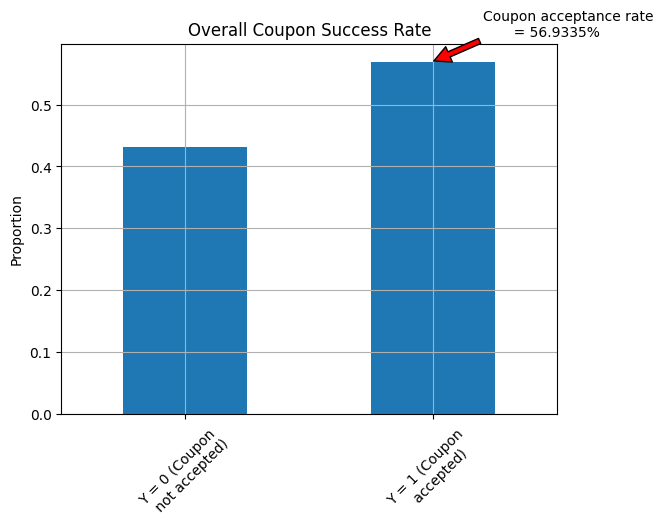

In [198]:
couponsuccess.plot.bar()
plt.title ('Overall Coupon Success Rate')
plt.xticks([0,1],["Y = 0 (Coupon \n not accepted)", "Y = 1 (Coupon \n accepted)"], rotation = 45)
plt.grid(True)
plt.annotate('Coupon acceptance rate \n       = 56.9335%', xy = (1,0.57), xytext = (1.2,0.61),
             arrowprops = dict(facecolor = 'red', shrink = 0.01))
plt.xlabel('')
plt.ylabel('Proportion')

plt.savefig('overallcouponsuccessrate.png',bbox_inches = 'tight')
plt.show() #plot.show should come after saving the figure, or the plot will be empty

5. Use a bar plot to visualize the `coupon` column.

In [203]:
#Frequency table
cleandata['coupon'].value_counts(normalize = True)

,proportion
coupon,
Coffee House,0.315920
Restaurant(<20),0.219637
Carry out & Take away,0.188757
Bar,0.158374
Restaurant(20-50),0.117311


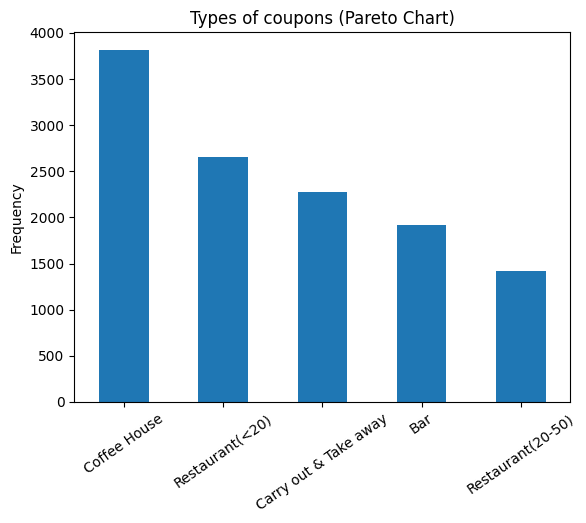

In [17]:
#Pareto chart (since categories are sorted in descending frequency order)
cleandata['coupon'].value_counts().plot.bar()
plt.title("Types of coupons (Pareto Chart)")
plt.xlabel('')
plt.xticks(rotation = 35)
plt.ylabel('Frequency')
plt.savefig('coupontypes_Pareto.png',bbox_inches = 'tight')
plt.show()

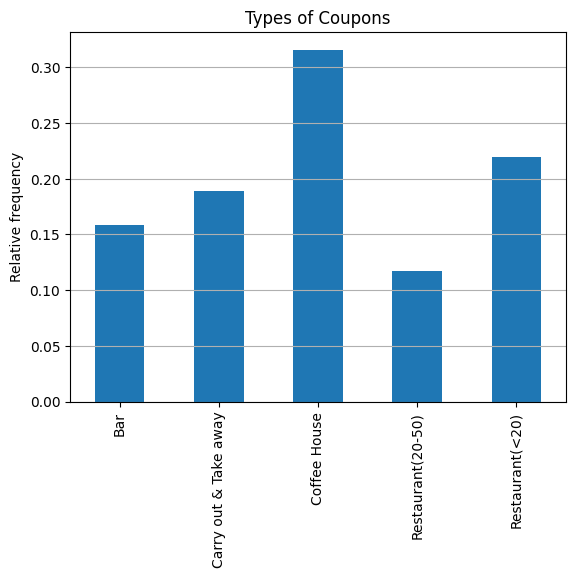

In [36]:
# Chart presented as relative frequency
(cleandata['coupon'].value_counts()/cleandata.shape[0]).sort_index().plot.bar()
plt.title('Types of Coupons')
plt.xlabel('')
plt.ylabel('Relative frequency')
plt.grid(axis = 'y')
plt.savefig('coupontypes_barchart.png',bbox_inches = 'tight')
plt.show()

The highest proportion of coupons offered corresponds to coffee houses, whereas the lowest proportion corresponds to the expensive restaurants (those with average expense per person between \$20 and \$50).

In [158]:
#Examine coupon acceptance rates by type of coupon
acc_rate = cleandata.groupby('coupon')['Y'].mean().reset_index(name = 'coupon_acceptance_rate')
acc_rate

,coupon,coupon_acceptance_rate
0,Bar,0.411918
1,Carry out & Take away,0.737719
2,Coffee House,0.496331
3,Restaurant(20-50),0.446013
4,Restaurant(<20),0.709009


In [206]:
acc_rate['coupon_acceptance_rate']

,coupon_acceptance_rate
0,0.411918
1,0.737719
2,0.496331
3,0.446013
4,0.709009


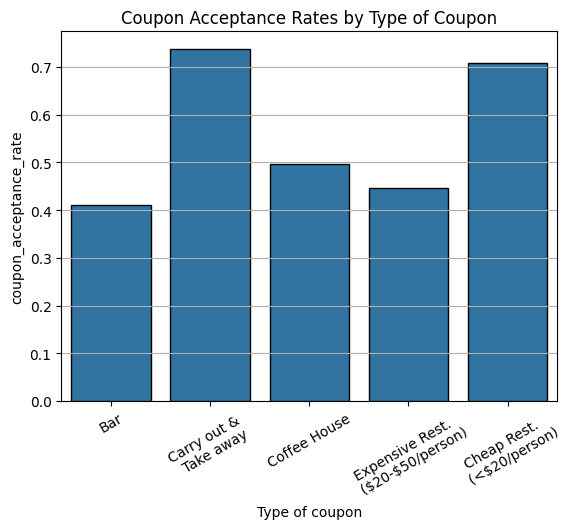

In [209]:
sns.barplot(acc_rate, x='coupon', y = 'coupon_acceptance_rate', edgecolor='black')
plt.title('Coupon Acceptance Rates by Type of Coupon')
plt.xlabel('Type of coupon')
plt.xticks([0,1,2,3,4],['Bar', 'Carry out & \n Take away', 'Coffee House', 'Expensive Rest. \n (\$20-\$50/person)', 'Cheap Rest. \n (<$20/person)'],rotation = 30)
plt.grid(axis = 'y')
plt.savefig('accratebycoupontype.png')
plt.show()

It can be appreciated that in terms of coupon acceptance rate, the most successful coupon category corresponds to "Carry out & Take away", followed closely by coupons for inexpensive restaurants (those with average expense per person below \$20).

6. Use a histogram to visualize the temperature column.

In [19]:
#Temperature is a numerical variable, but takes only three possible values
cleandata['temperature'].value_counts()

,count
temperature,
80,6222
55,3662
30,2195


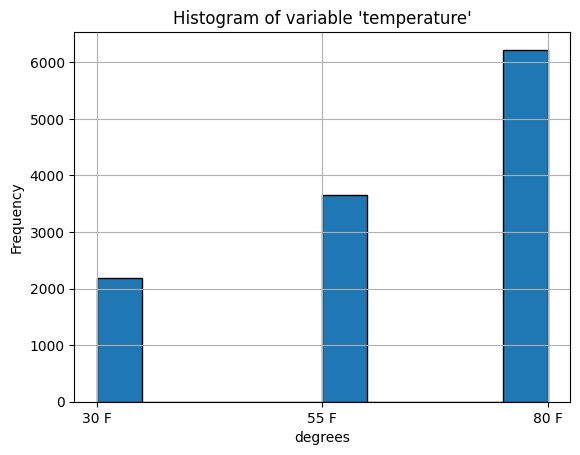

In [20]:
plt.title("Histogram of variable 'temperature'")
plt.hist(cleandata['temperature'], edgecolor = 'black')
plt.xlabel('degrees')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks([30,55,80],['30 F', '55 F', '80 F'])
plt.savefig('temperature_histogram.png',bbox_inches = 'tight')
plt.show()

In [210]:
#Explore the breakdown of drivers accepting coupons by temperature values
twoway = pd.crosstab(cleandata['temperature'], cleandata['Y'],normalize = 'all')

In [211]:
print(twoway)

Y                   0         1
temperature                    
30           0.084113  0.097607
55           0.140326  0.162845
80           0.206226  0.308883


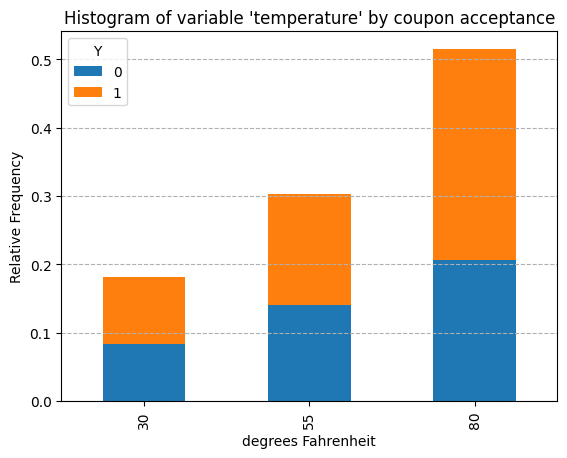

In [213]:
twoway.plot(kind='bar', stacked = True)
plt.title("Histogram of variable 'temperature' by coupon acceptance")
plt.xlabel('degrees Fahrenheit')
plt.ylabel('Relative Frequency')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [25]:
barcoupons = cleandata.query('coupon == "Bar"')
barcoupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passenger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?


In [26]:
barcoupons['Y'].value_counts(normalize = True).sort_index()

,proportion
Y,
0,0.588082
1,0.411918


We see that 41.1918\% of bar-related coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [37]:
#Create filtering lists
#for how often users go to bars (or other establishments)
low = ['never', 'less1', '1~3']
high = ['4~8', 'gt8']

In [38]:
#Split the data
bar_low = barcoupons.query('Bar in @low')
bar_high = barcoupons.query('Bar in @high')

In [39]:
#Coupon acceptance rate for users who go to bars 3 or fewer times per month
bar_low['Y'].value_counts(normalize = True).sort_index()

,proportion
Y,
0,0.627326
1,0.372674


In [40]:
#Coupon acceptance rate for users who go to bars more than 3 times per month
bar_high['Y'].value_counts(normalize = True).sort_index()

,proportion
Y,
0,0.238342
1,0.761658


The contrast in the coupon acceptance rates for each group of users is clear: 76.17\% for those who go to bars more than 3 times per month versus only 37.27\% for those who go fewer times.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [41]:
#Explore categories in variable 'age'
barcoupons['age'].value_counts()

,count
age,
21,397
26,368
31,324
50plus,273
36,196
41,171
46,103
below21,81


####Note on auxiliary filters:
I am taking the categories {“1\~3”, “4\~8”, “gt8”} to correspond to “going more than once a month”, and {“never”, “less1”} to be the complement of that.

In [42]:
#Auxiliary filters
ltoncemonth = ['never', 'less1']
onceormore = ['1~3', '4~8', 'gt8']

age25orless = ['below21', '21']
ageover25 = ['26', '31', '36', '41', '46', '50plus']

In [43]:
#Drivers who are over the age of 25 and go to bars more than once a month (raw counts):
barcoupons.query('age in @ageover25 and Bar in @onceormore')['Y'].value_counts().sort_index()

,count
Y,
0,125
1,278


In [44]:
#Drivers who are over the age of 25 and go to bars more than once a month --Coupon success rate:
barcoupons.query('age in @ageover25 and Bar in @onceormore')['Y'].value_counts(normalize = True).sort_index()

,proportion
Y,
0,0.310174
1,0.689826


In [45]:
#Official query for "everyone else"
# The complement of (A and B) is the union notA or notB
barcoupons.query('age in @age25orless | Bar in @ltoncemonth')['Y'].value_counts().sort_index()


,count
Y,
0,1000
1,510


In [46]:
#Everyone else : Coupon success rate
barcoupons.query('age in @age25orless | Bar in @ltoncemonth')['Y'].value_counts(normalize=True).sort_index()

,proportion
Y,
0,0.662252
1,0.337748


Once again, the contrast in the coupon acceptance rate is clear: 68.98\% vs 33.77\% for these two groups.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


A quick examination of the variable 'occupation' reveals that there is a single category label that contains farming, fishing and forestry.

In [47]:
#Will use the previous filter @onceormore and @ltoncemonth for the "Bar" variable

#Multiple query: drivers who go to bars more than once a month, have passsengers that are not kids, AND
# have occupations other than farming, fishing, or forestry.

barcoupons.query('(Bar in @onceormore and passenger != "Kid(s)") and occupation != "Farming Fishing & Forestry"')['Y'].value_counts(normalize=True).sort_index()

,proportion
Y,
0,0.290566
1,0.709434


In [48]:
#Everyone else
barcoupons.query('(Bar in @ltoncemonth | passenger == "Kid(s)") | occupation == "Farming Fishing & Forestry"')['Y'].value_counts(normalize=True).sort_index()

,proportion
Y,
0,0.702097
1,0.297903


Coupon acceptance rate of 70.94\% vs. 29.79\% for this partition of the data.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [49]:
#Multiple query: bars more than once a month AND passengers not a kid AND not widowed

barcoupons.query('(Bar in @onceormore and passenger != "Kid(s)") and maritalStatus != "widowed"')['Y'].value_counts(normalize=True).sort_index()

,proportion
Y,
0,0.290566
1,0.709434


In [51]:
#Multiple query: bars more than once a month AND aged under 30

under30 = ['below21', '21', '26']

barcoupons.query('Bar in @onceormore and age in @under30')['Y'].value_counts(normalize=True).sort_index()

,proportion
Y,
0,0.280488
1,0.719512


In [52]:
#Multiple query: RestaurantLessThan20 more than 4 times/ month AND income < %50K

morethan4permonth = ['4~8','gt8']
incomeless50K = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

barcoupons.query('RestaurantLessThan20 in @morethan4permonth and income in @incomeless50K')['Y'].value_counts(normalize=True).sort_index()

,proportion
Y,
0,0.543544
1,0.456456


Acceptance rates for drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed: **70.9434\%**
- go to bars more than once a month and are under the age of 30: **71.9512\%**
- go to cheap restaurants more than 4 times a month and income is less than 50K: **45.6456\%**

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Response:**
It seems clear that a big determinant of a driver accepting a coupon for a bar is whether they tend to go to bars (at least once per month, which may not necessarily be a lot to ask). A second element has to do with whether the driver has kids as passengers, which (understandably) lowers the coupon acceptance rate. This can also be loosely related to the driver's age, with younger drivers tending to accept the coupon at a higher rate than older ones (though this is not strictly true, as people in their 40s seem to accept the coupon at a higher rate than those in their 30s -- see table below). Finally, it appears that income (measured directly and through the number of times users go to "cheap restaurants") may be inversely related to the probability of a driver accepting a bar-related coupon.



In [53]:
#A focused look at the coupon acceptance rates broken down by age.
barcoupons.groupby('age')['Y'].mean()

,Y
age,
21,0.503778
26,0.486413
31,0.376543
36,0.306122
41,0.438596
46,0.368932
50plus,0.293040
below21,0.419753


A final observation is that filtering the driver's occupation to restrict "farming, fishing, or forestry", or by the driver not being widowed does not really affect the coupon acceptance rate, as shown below:

In [85]:
# Notice that since the variable 'Y' is binary (coupon accepted, Yes = 1 or No = 0),
# the mean effectively represents the proportion of coupons accepted.
# Will use this throughout the rest of the analysis!

barcoupons.query('Bar in @onceormore and passenger != "Kid(s)"')['Y'].mean()

0.7094339622641509

In [86]:
barcoupons.query('Bar in @ltoncemonth | passenger == "Kid(s)"')['Y'].mean()

0.29790310918293567

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [69]:
#Create auxiliary 'distance' variable as the sum of the three "toCoupon_GEQ" columns;
#This will create values of 0, 1, 2, or 3 for coupon destinations less than 5 minutes away,
#between 5 and 15 minutes away, between 15 and 25 minutes away, or more than 25 minutes away/

cleandata['distance'] = cleandata['toCoupon_GEQ5min'] + cleandata['toCoupon_GEQ15min'] + cleandata['toCoupon_GEQ25min']

<ipython-input-69-561f73f96c7a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata['distance'] = cleandata['toCoupon_GEQ5min'] + cleandata['toCoupon_GEQ15min'] + cleandata['toCoupon_GEQ25min']


Note: I see that there is a warning here (since I eliminated a column and a number of rows with missing values from the original dataframe). The variable 'distance' is successfully created nonetheless.

In [70]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [59]:
#Explore distribution of coupons
cleandata['coupon'].value_counts(normalize = True)

,proportion
coupon,
Coffee House,0.315920
Restaurant(<20),0.219637
Carry out & Take away,0.188757
Bar,0.158374
Restaurant(20-50),0.117311


In [61]:
cleandata.groupby('coupon')['Y'].mean()

,Y
coupon,
Bar,0.411918
Carry out & Take away,0.737719
Coffee House,0.496331
Restaurant(20-50),0.446013
Restaurant(<20),0.709009


I will focus on the coupons for "Coffee House" (cafes/coffee houses), which represent the largest share of coupons in the set. Notice that it does not have the highest acceptance rate, so I anticipate the analysis could suggest characteristics that make a difference in drivers accepting the coupon.

In [83]:
coffeecoupons = cleandata.query('coupon == "Coffee House"')
coffeecoupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3816 entries, 23 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passenger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3816 non-null   object
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   object
 14  Bar                   3816 non-null   object
 15  CoffeeHouse           3816 non-null   obj

As mentioned earlier, since the 'Y' variable is coded as 0s and 1s, the mean is effectively a proportion (the coupon acceptance rate).

In [ ]:
#Explore coupon acceptance rate by response to "CoffeeHouse"
coffeecoupons.groupby('CoffeeHouse')['Y'].mean()

,Y
CoffeeHouse,
1~3,0.647694
4~8,0.682446
gt8,0.657895
less1,0.480989
never,0.175223


So it looks like the frequency with which the user visits cafes/coffee houses is directly related with the likelihood that they will accept the coupon.

In [ ]:
#Will use existing filters for how often users visit a CoffeeHouse (ltoncemonth/onceormore)

In [94]:
#Aggregating using "onceormore" and "ltoncemonth" lists
print("Coupon acceptance rates for drivers who:")
print("go to coffee houses once a month or more: ", coffeecoupons.query('CoffeeHouse in @onceormore')['Y'].mean())
print("go to coffee houses less than once a month: ",coffeecoupons.query('CoffeeHouse in @ltoncemonth')['Y'].mean())

Coupon acceptance rates for drivers who:
go to coffee houses once a month or more:  0.6589935760171306
go to coffee houses less than once a month:  0.34034907597535935


This is already an important difference in the coupon acceptance rate. Although it may seem that the restriction "going (to coffee houses) once a month or more" is not that strict, it splits the dataset almost exactly in half (see table below).

In [95]:
coffeecoupons['CoffeeHouse'].value_counts(normalize = True)

,proportion
CoffeeHouse,
less1,0.275681
1~3,0.267034
never,0.234801
4~8,0.132862
gt8,0.089623


Now we can explore whether there is a noticeable relationship between the type of passenger and the coupon acceptance rate:

In [ ]:
coffeecoupons.groupby('passenger')['Y'].mean()

,Y
passenger,
Alone,0.433936
Friend(s),0.597447
Kid(s),0.471503
Partner,0.567010


This doesn't look as distinctive as the previous exploration by frequency with which the user goes to coffee houses, though it seems like drivers with peer companions (friends and/or partner) tend to accept the coupon for a coffee house at a higher rate.



In [103]:
# Filtering lists
peer = ['Friend(s)', 'Partner']
notpeer = ['Alone', 'Kid(s)']

In [104]:
#Combine type of passenger (peer/not peer) with frequency filter (onceormore/ltoncemonth)

print("Coupon acceptance rates for drivers who:")
print("* go to coffee houses once a month or more AND have peer companions: ",
      coffeecoupons.query('CoffeeHouse in @onceormore and passenger in @peer')['Y'].mean())
print("* fail at least one of the conditions above:                         ",
      coffeecoupons.query('CoffeeHouse in @ltoncemonth | passenger in @notpeer')['Y'].mean())

Coupon acceptance rates for drivers who:
* go to coffee houses once a month or more AND have peer companions:  0.7673758865248227
* fail at least one of the conditions above:                          0.43490838958534234


**Exploring possible associations between coupon acceptance and other variables:**

---



In [ ]:
#Explore possible associations between coupon acceptance and other variables:
coffeecoupons.groupby('distance')['Y'].mean()

,Y
distance,
1,0.545256
2,0.470309
3,0.342282


In [ ]:
coffeecoupons.groupby('destination')['Y'].mean()

,Y
destination,
Home,0.362613
No Urgent Place,0.578178
Work,0.440000


In [125]:
#Adding combination of contextual characteristics: destination and distance

print("Coupon acceptance rates for drivers who:")
print("* go to coffee houses once a month or more,  have peer companions, are driving")
print(" to 'No Urgent Place' AND are less than 15 minutes from destination: ",
      coffeecoupons.query('(CoffeeHouse in @onceormore and passenger in @peer) and (destination == "No Urgent Place" and distance == 1)')['Y'].mean())
print("* fail at least one of the conditions above:                         ",
      coffeecoupons.query('(CoffeeHouse in @ltoncemonth | passenger in @notpeer) | (destination != "No Urgent Place" | distance != 1)')
      ['Y'].mean())


Coupon acceptance rates for drivers who:
* go to coffee houses once a month or more,  have peer companions, are driving
 to 'No Urgent Place' AND are less than 15 minutes from destination:  0.8093922651933702
* fail at least one of the conditions above:                          0.4635205558772438


In [ ]:
coffeecoupons.groupby('time')['Y'].mean()

,Y
time,
10AM,0.634772
10PM,0.429078
2PM,0.545455
6PM,0.412272
7AM,0.440000


In [118]:
#Filter time as "midday" vs early vs late
midday = ['10AM', '2PM']
early = ['7AM']
late = ['6PM', '10PM']



In [154]:
#Include filtering whether drive takes place during "midday" (10 am to 2 pm) and explore taking out the "peer companion":

print("Coupon acceptance rates for drivers who:")
print("* are 25 years old or younger, go to coffee houses once a month or more, are driving")
print(" to 'No Urgent Place', in the middle of the day AND are less than 15 minutes from destination: ",
coffeecoupons.query('(age in @age25orless and CoffeeHouse in @onceormore) and (destination == "No Urgent Place" and time in @midday) and distance == 1')['Y'].mean())

print("* fail at least one of the conditions above:                                                   ",
      coffeecoupons.query('(age in @ageover25 | CoffeeHouse in @ltoncemonth) | (destination != "No Urgent Place" | time in @early) | (time in @late | distance >1)')['Y'].mean())

Coupon acceptance rates for drivers who:
* are 25 years old or younger, go to coffee houses once a month or more, are driving
 to 'No Urgent Place', in the middle of the day AND are less than 15 minutes from destination:  0.8761904761904762
* fail at least one of the conditions above:                                                    0.4855834007006198


In [149]:
#Bring back the peer companion for comparison purposes:
print("Coupon acceptance rates for drivers who:")
print("* are 25 years old or younger, go to coffee houses once a month or more,  have peer companions,")
print("  are driving in the middle of the day (10 am to 2 pm), to 'No Urgent Place' AND are ")
print("  less than 15 minutes from destination:                                                          ",
      coffeecoupons.query('(CoffeeHouse in @onceormore and passenger in @peer) and (destination == "No Urgent Place" and distance == 1) and (age in @age25orless and time in @midday )')
      ['Y'].mean())
print("* fail at least one of the conditions above:                                                      ",
      coffeecoupons.query('(CoffeeHouse in @ltoncemonth | passenger in @notpeer) | (destination != "No Urgent Place" | distance != 1) | age in @ageover25 | (time in @early | time in @late) ')
      ['Y'].mean())



Coupon acceptance rates for drivers who:
* are 25 years old or younger, go to coffee houses once a month or more,  have peer companions,
  are driving in the middle of the day (10 am to 2 pm), to 'No Urgent Place' AND are 
  less than 15 minutes from destination:                                                           0.875
* fail at least one of the conditions above:                                                       0.48822269807280516


In [146]:
# Additional age filters
under30 = ['below21', '21', '26']
over30 = ['31', '36', '41', '46', '50plus']

In [150]:
#Modify query to filter age as under30 or over30

print("Coupon acceptance rates for drivers who:")
print("* are 30 years old or younger, go to coffee houses once a month or more,  have peer companions,")
print("  are driving in the middle of the day (10 am to 2 pm), to 'No Urgent Place' AND are ")
print("  less than 15 minutes from destination:                                                          ",
      coffeecoupons.query('(CoffeeHouse in @onceormore and passenger in @peer) and (destination == "No Urgent Place" and distance == 1) and (age in @under30 and time in @midday )')
      ['Y'].mean())
print("* fail at least one of the conditions above:                                                      ",
      coffeecoupons.query('(CoffeeHouse in @ltoncemonth | passenger in @notpeer) | (destination != "No Urgent Place" | distance != 1) | age in @over30 | (time in @early | time in @late) ')
      ['Y'].mean())



Coupon acceptance rates for drivers who:
* are 30 years old or younger, go to coffee houses once a month or more,  have peer companions,
  are driving in the middle of the day (10 am to 2 pm), to 'No Urgent Place' AND are 
  less than 15 minutes from destination:                                                           0.8441558441558441
* fail at least one of the conditions above:                                                       0.4817039868924085


In [226]:
accepted = coffeecoupons.query('Y == 1')
accepted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1894 entries, 45 to 12631
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1894 non-null   object
 1   passenger             1894 non-null   object
 2   weather               1894 non-null   object
 3   temperature           1894 non-null   int64 
 4   time                  1894 non-null   object
 5   coupon                1894 non-null   object
 6   expiration            1894 non-null   object
 7   gender                1894 non-null   object
 8   age                   1894 non-null   object
 9   maritalStatus         1894 non-null   object
 10  has_children          1894 non-null   int64 
 11  education             1894 non-null   object
 12  occupation            1894 non-null   object
 13  income                1894 non-null   object
 14  Bar                   1894 non-null   object
 15  CoffeeHouse           1894 non-null   obj

In [227]:
accepted['weather'].value_counts()

,count
weather,
Sunny,1661
Snowy,122
Rainy,111


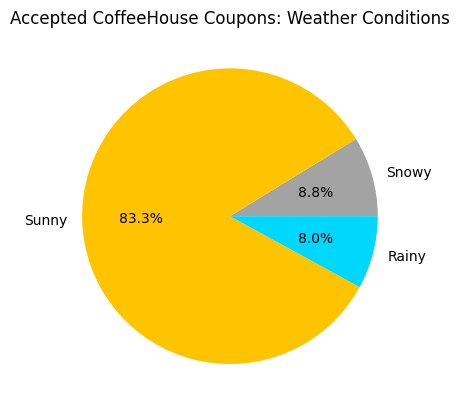

In [247]:
#Pie chart breaking down weather conditions for accepted coffee house coupons
cts = [122, 1161, 111]
labels = ['Snowy','Sunny', 'Rainy']
colors = sns.color_palette('bright')[7:10]
plt.title('Accepted CoffeeHouse Coupons: Weather Conditions')
plt.pie(cts,labels = labels, colors = colors, autopct = '%1.1f%%')
plt.show()

In [228]:
cleandata.groupby('weather')['Y'].mean()

,Y
weather,
Rainy,0.462075
Snowy,0.476334
Sunny,0.595042


##Findings:
This last query shows a rather specific combination of variable values that characterize drivers who are most likely to accept a coupon for a coffee house. These drivers are:


*   young (25 or younger);
*   go to coffee houses at least once a month;
*   are driving in the middle of the day (10 am to 2 pm);
*   are not in a hurry (destination is "No Urgent Place"); and
*   are located less than a 15-minute drive away from the establishment offering the coupon; and
*   (possibly) are driving with peer companions --a partner or friends.




**End of notebook.**



---


##APPENDIX: Extra explorations

Other ways of slicing the data do not seem to shed light on characteristics that differentiate the likelihood that drivers will accept the coffee house coupon. Some of these are presented below, and include: by income, by education level, and even by whether the establishment offering the coupon is in the same direction they are already on.

In [ ]:
coffeecoupons.groupby('income')['Y'].mean()

,Y
income,
$100000 or More,0.489524
$12500 - $24999,0.552212
$25000 - $37499,0.465154
$37500 - $49999,0.547406
$50000 - $62499,0.498047
$62500 - $74999,0.435424
$75000 - $87499,0.298246
$87500 - $99999,0.539419
Less than $12500,0.540268


In [ ]:
coffeecoupons.groupby('direction_same')['Y'].mean()

,Y
direction_same,
0,0.489355
1,0.526536


In [141]:
coffeecoupons.groupby('education')['Y'].mean()

,Y
education,
Associates degree,0.513846
Bachelors degree,0.456113
Graduate degree (Masters or Doctorate),0.507666
High School Graduate,0.540441
Some High School,0.607143
Some college - no degree,0.514307


In [216]:
cleandata.groupby('gender')['Y'].mean()

,Y
gender,
Female,0.547508
Male,0.592347


In [217]:
cleandata.groupby('income')['Y'].mean()

,Y
income,
$100000 or More,0.578014
$12500 - $24999,0.577546
$25000 - $37499,0.597186
$37500 - $49999,0.570752
$50000 - $62499,0.589776
$62500 - $74999,0.527381
$75000 - $87499,0.492629
$87500 - $99999,0.523227
Less than $12500,0.587771


In [219]:
cleandata.groupby('maritalStatus')['Y'].mean()

,Y
maritalStatus,
Divorced,0.525794
Married partner,0.542952
Single,0.610288
Unmarried partner,0.555664
Widowed,0.472222


In [220]:
cleandata.groupby('occupation')['Y'].mean()

,Y
occupation,
Architecture & Engineering,0.634286
Arts Design Entertainment Sports & Media,0.533688
Building & Grounds Cleaning & Maintenance,0.590909
Business & Financial,0.569767
Community & Social Services,0.497717
Computer & Mathematical,0.563596
Construction & Extraction,0.688312
Education&Training&Library,0.513450
Farming Fishing & Forestry,0.534884


In [221]:
cleandata.groupby('has_children')['Y'].mean()

,Y
has_children,
0,0.589223
1,0.540535


In [222]:
cleandata.groupby('age')['Y'].mean()

,Y
age,
21,0.594009
26,0.599833
31,0.552208
36,0.538707
41,0.574648
46,0.576807
50plus,0.507506
below21,0.632937


In [224]:
cleandata.groupby('weather')['Y'].mean()

,Y
weather,
Rainy,0.462075
Snowy,0.476334
Sunny,0.595042
